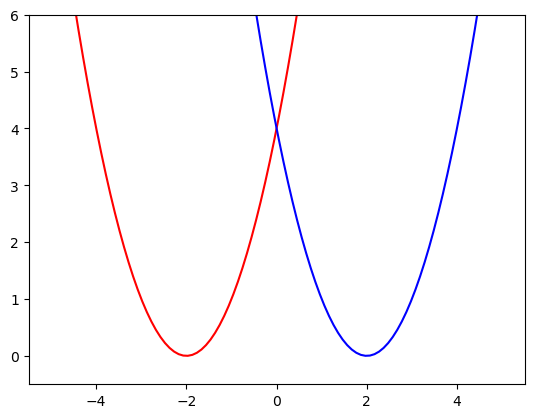

In [1]:
%matplotlib inline
from math import *
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import scipy.stats
np.set_printoptions(precision=3)
def u0(x):
    return (x+2)**2
def u1(x):
    return (x-2)**2
x=np.linspace(-5,5,100)
y0=u0(x)
y1=u1(x)
plt.ylim(-.5, 6)
plt.plot(x,y0,'r',x,y1,'b')
plt.show()

In [2]:
def ulmbd(lamb,x):
    return (1-lamb)*u0(x)+lamb*u1(x)

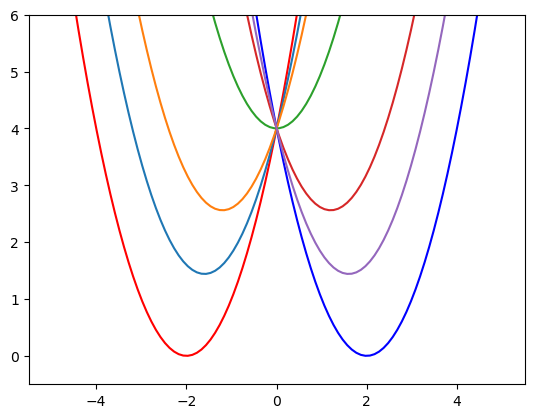

In [3]:
x=np.linspace(-5,5,100)
y0=ulmbd(0.0,x)
y1=ulmbd(0.1,x)
y2=ulmbd(0.2,x)
y5=ulmbd(0.5,x)
y8=ulmbd(0.8,x)
y9=ulmbd(0.9,x)
yN=ulmbd(1.0,x)
plt.ylim(-.5, 6)
plt.plot(x,y0,'r')
plt.plot(x,yN,'b')
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y5)
plt.plot(x,y8)
plt.plot(x,y9)
plt.show()

In [4]:
def MCpropagator2(x0,dx,N,dN,ulmbd,lamb):
    count = 0
    x = np.empty(N)
    xcurrent = x0
    while count < N:
        innercount = 0
        while innercount < dN:
            rnd = np.random.uniform(0.,1.)
            if rnd<0.5:
                xtrial = xcurrent - dx
            else:
                xtrial = xcurrent + dx

            deltau = ulmbd(lamb,xtrial) - ulmbd(lamb,xcurrent)
            if deltau < 0:
                xcurrent = xtrial
            else:
                acceptanceratio = np.exp(-deltau)
                if acceptanceratio > np.random.uniform(0.0,1.0):
                    xcurrent = xtrial
                else:
                    xcurrent = xcurrent
            innercount = innercount + 1
        x[count] = xcurrent
        count = count + 1
    return x, count

def TI(x):
    du=np.zeros(x.size)
    du = u1(x)-u0(x)
    S = np.mean(du)
    varS = np.var(du)/x.size
    return S, varS


The free energy difference from lambda 0.00 to lambda 0.10 is     1.41 +-  0.01
The free energy difference from lambda 0.10 to lambda 0.20 is     1.13 +-  0.01
The free energy difference from lambda 0.20 to lambda 0.30 is     0.80 +-  0.01
The free energy difference from lambda 0.30 to lambda 0.40 is     0.46 +-  0.01
The free energy difference from lambda 0.40 to lambda 0.50 is     0.15 +-  0.01
The free energy difference from lambda 0.50 to lambda 0.60 is    -0.19 +-  0.01
The free energy difference from lambda 0.60 to lambda 0.70 is    -0.48 +-  0.01
The free energy difference from lambda 0.70 to lambda 0.80 is    -0.77 +-  0.01
The free energy difference from lambda 0.80 to lambda 0.90 is    -1.11 +-  0.01
The free energy difference from lambda 0.90 to lambda 1.00 is    -1.45 +-  0.01

The total free energy difference is    -0.06 +-  0.06


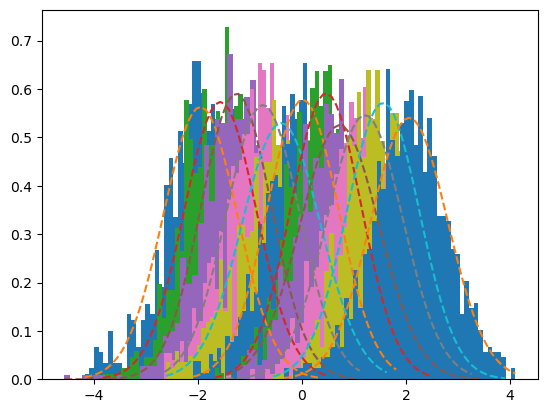

In [5]:
dx = 0.01
N = 11000
dN = 1600
dlambda = 0.1
lambs = np.arange(0.0,1.,dlambda)
lambs = np.append(lambs,[1.0])
Ns = N//len(lambs)
dAdl = np.zeros(len(lambs))
vardAdl = np.zeros(len(lambs))
i = 0
for i in range(len(lambs)):
    x0 = -2.0 + 3.0*i*dlambda
    x = np.empty(Ns)
    x, count = MCpropagator2(x0,dx,Ns,dN,ulmbd,lambs[i])
#    print('Number of samples generated:%8d for lambda= %5.2f' %(count,lambs[i]))
    prob, bins, patches = plt.hist(x, bins=50, density=True)
    mean = np.mean(x)
    variance = np.var(x)
    sigma = np.sqrt(variance)
    npdf = scipy.stats.norm.pdf(bins,mean,sigma)
    plt.plot(bins, npdf, '--')
    dAdl[i], vardAdl[i] = TI(x)

dA=0.0
for i in range(len(lambs)-1):
    print('The free energy difference from lambda %4.2f to lambda %4.2f is %8.2f +- %5.2f' % (lambs[i],lambs[i+1],0.5*dlambda*(dAdl[i]+dAdl[i+1]), 0.5*dlambda*np.sqrt(vardAdl[i]+vardAdl[i+1])))
    dA += 0.5*dlambda*(dAdl[i]+dAdl[i+1])

vardA=(0.5*dlambda)**2*(vardAdl[0]+vardAdl[-1])
for i in range(1,len(lambs)-1):
    vardA += dlambda**2*vardAdl[i]
print('')
print('The total free energy difference is %8.2f +- %5.2f' %(dA,np.sqrt(vardA)))
plt.show()